<a href="https://colab.research.google.com/github/claudiohfg/notebooks/blob/main/CIFAR10_Manual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load CIFAR-10 classes

In [ ]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [ ]:
!python --version

Python 3.6.9


In [ ]:
import pandas as pd
df = pd.read_html("https://www.cs.toronto.edu/~kriz/cifar.html")
cifar10_classes = df[0][0].values.tolist()
cifar10_classes = dict(enumerate(cifar10_classes))

# Load CIFAR-10 datasets

In [ ]:
import tensorflow as tf
(X_train, Y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
X_train.shape, Y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

# Plot some CIFAR-10 images

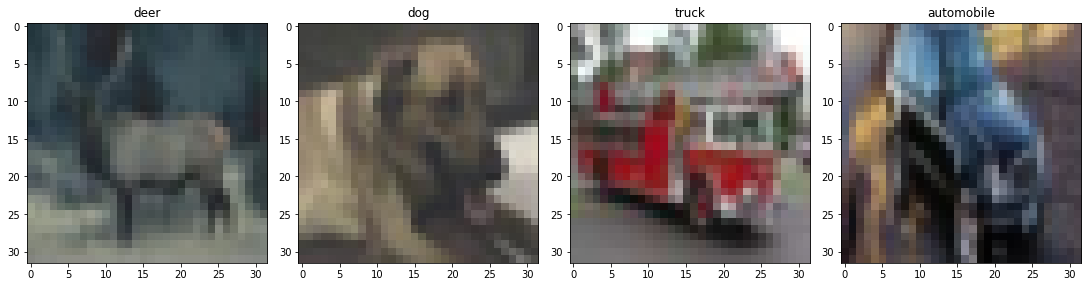

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

imagens = [np.random.randint(X_train.shape[0]) for x in range(4)]
fig, axs = plt.subplots(1, 4, figsize=(15, 4), constrained_layout=True)
for ax, img in zip(axs, imagens):
    ax.imshow(X_train[img])
    ax.set_title(f"{cifar10_classes[Y_train[img][0]]}")
plt.show()

# One hot encode labels & standard scale data



In [ ]:
Y_train = tf.keras.utils.to_categorical(Y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

X_train = X_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Z-score calculation

In [ ]:
import numpy as np

mean = np.mean(X_train, axis=(0,1,2,3))
std = np.std(X_train, axis=(0,1,2,3))

X_train = (X_train - mean)/(std + 1e-7)
x_test = (x_test - mean)/(std + 1e-7)

# Train test split data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(
    X_train, Y_train, test_size=0.3, random_state=42
    )

# ImageDataGenerator

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
BATCH_SIZE = 64
train_generator = train_datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

# Model 1

In [ ]:
import tensorflow.keras.layers as L
import tensorflow.keras.models as M
import tensorflow.keras.optimizers as O

model = M.Sequential([
    L.Conv2D(filters=8, kernel_size=3, padding="same", activation="relu", 
             input_shape=x_train.shape[1:]),
    L.Conv2D(filters=16, kernel_size=3, padding="same", activation="relu"),
    L.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    L.Flatten(),
    L.Dense(units=10, activation='softmax')
])

opt = O.RMSprop(lr=0.001, decay=1e-6)
model.compile(
    optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 8)         224       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 16)        1168      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
flatten_4 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                327690    
Total params: 333,722
Trainable params: 333,722
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    'sgd', loss='mse', 
    metrics=[tf.keras.metrics.MeanSquaredError()]
)

In [ ]:
EPOCHS = 20
model.fit(
    train_generator, steps_per_epoch=x_train.shape[0]//BATCH_SIZE, 
    epochs=EPOCHS, validation_data=(x_val, y_val), verbose=1
)


Epoch 1/20
546/546 [==============================] - 4s 7ms/step - loss: 1.4735 - accuracy: 0.4827 - val_loss: 1.2010 - val_accuracy: 0.5832
Epoch 2/20
546/546 [==============================] - 4s 7ms/step - loss: 1.0648 - accuracy: 0.6328 - val_loss: 1.1837 - val_accuracy: 0.5875
Epoch 3/20
546/546 [==============================] - 4s 7ms/step - loss: 0.8500 - accuracy: 0.7111 - val_loss: 1.0994 - val_accuracy: 0.6231
Epoch 4/20
546/546 [==============================] - 4s 7ms/step - loss: 0.6817 - accuracy: 0.7711 - val_loss: 1.1142 - val_accuracy: 0.6316
Epoch 5/20
546/546 [==============================] - 4s 7ms/step - loss: 0.5260 - accuracy: 0.8261 - val_loss: 1.2168 - val_accuracy: 0.6247
Epoch 6/20
546/546 [==============================] - 4s 7ms/step - loss: 0.3901 - accuracy: 0.8731 - val_loss: 1.3574 - val_accuracy: 0.6166
Epoch 7/20
546/546 [==============================] - 4s 7ms/step - loss: 0.2725 - accuracy: 0.9120 - val_loss: 1.6097 - val_accuracy: 0.6129
Epoch 

In [ ]:
model.fit(
    x_val, y_val, batch_size=BATCH_SIZE, 
    steps_per_epoch=x_val.shape[0]//BATCH_SIZE, epochs=EPOCHS, verbose=1
)

Epoch 1/20
234/234 [==============================] - 1s 4ms/step - loss: 1.9076 - accuracy: 0.5254
Epoch 2/20
234/234 [==============================] - 1s 4ms/step - loss: 1.0177 - accuracy: 0.6596
Epoch 3/20
234/234 [==============================] - 1s 4ms/step - loss: 0.6894 - accuracy: 0.7704
Epoch 4/20
234/234 [==============================] - 1s 4ms/step - loss: 0.4377 - accuracy: 0.8616
Epoch 5/20
234/234 [==============================] - 1s 4ms/step - loss: 0.2589 - accuracy: 0.9239
Epoch 6/20
234/234 [==============================] - 1s 4ms/step - loss: 0.1336 - accuracy: 0.9662
Epoch 7/20
234/234 [==============================] - 1s 4ms/step - loss: 0.0611 - accuracy: 0.9861
Epoch 8/20
234/234 [==============================] - 1s 4ms/step - loss: 0.0284 - accuracy: 0.9942
Epoch 9/20
234/234 [==============================] - 1s 4ms/step - loss: 0.0122 - accuracy: 0.9977
Epoch 10/20
234/234 [==============================] - 1s 4ms/step - loss: 0.0070 - accuracy: 0.9983

In [ ]:
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 58.630


# Model 2: more convolutions

In [ ]:
model = M.Sequential([
    L.Conv2D(filters=8, kernel_size=3, padding="same", activation="relu", 
             input_shape=x_train.shape[1:]),
    L.Conv2D(filters=8, kernel_size=3, padding="same", activation="relu"),
    L.Conv2D(filters=16, kernel_size=3, padding="same", activation="relu"),
    L.Conv2D(filters=16, kernel_size=3, padding="same", activation="relu"),
    L.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    L.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    L.Flatten(),
    L.Dense(units=10, activation='softmax')
])

opt = O.RMSprop(lr=0.001, decay=1e-6)
model.compile(
    optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 8)         224       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 8)         584       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 32, 32, 16)        1168      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 32, 32, 16)        2320      
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
flatten_5 (Flatten)          (None, 32768)            

In [ ]:
model.fit(
    train_generator, steps_per_epoch=x_train.shape[0]//BATCH_SIZE, 
    epochs=EPOCHS, validation_data=(x_val, y_val), verbose=1
)

Epoch 1/20
546/546 [==============================] - 5s 10ms/step - loss: 1.6067 - accuracy: 0.4318 - val_loss: 1.2979 - val_accuracy: 0.5351
Epoch 2/20
546/546 [==============================] - 5s 9ms/step - loss: 1.1920 - accuracy: 0.5806 - val_loss: 1.2715 - val_accuracy: 0.5630
Epoch 3/20
546/546 [==============================] - 5s 9ms/step - loss: 1.0025 - accuracy: 0.6508 - val_loss: 1.2321 - val_accuracy: 0.5758
Epoch 4/20
546/546 [==============================] - 5s 9ms/step - loss: 0.8538 - accuracy: 0.7041 - val_loss: 1.0823 - val_accuracy: 0.6240
Epoch 5/20
546/546 [==============================] - 5s 9ms/step - loss: 0.7286 - accuracy: 0.7518 - val_loss: 1.1098 - val_accuracy: 0.6313
Epoch 6/20
546/546 [==============================] - 5s 9ms/step - loss: 0.5917 - accuracy: 0.7992 - val_loss: 1.1373 - val_accuracy: 0.6347
Epoch 7/20
546/546 [==============================] - 5s 9ms/step - loss: 0.4715 - accuracy: 0.8419 - val_loss: 1.3485 - val_accuracy: 0.6138
Epoch

In [ ]:
model.fit(
    x_val, y_val, batch_size=BATCH_SIZE,
    steps_per_epoch=x_val.shape[0]//BATCH_SIZE, epochs=EPOCHS, verbose=1
)

Epoch 1/20
234/234 [==============================] - 2s 6ms/step - loss: 1.4058 - accuracy: 0.5702
Epoch 2/20
234/234 [==============================] - 2s 6ms/step - loss: 0.8931 - accuracy: 0.6918
Epoch 3/20
234/234 [==============================] - 2s 6ms/step - loss: 0.6371 - accuracy: 0.7825
Epoch 4/20
234/234 [==============================] - 2s 6ms/step - loss: 0.4353 - accuracy: 0.8600
Epoch 5/20
234/234 [==============================] - 2s 7ms/step - loss: 0.2630 - accuracy: 0.9189
Epoch 6/20
234/234 [==============================] - 2s 6ms/step - loss: 0.1411 - accuracy: 0.9586
Epoch 7/20
234/234 [==============================] - 2s 6ms/step - loss: 0.0719 - accuracy: 0.9796
Epoch 8/20
234/234 [==============================] - 2s 6ms/step - loss: 0.0407 - accuracy: 0.9888
Epoch 9/20
234/234 [==============================] - 2s 6ms/step - loss: 0.0246 - accuracy: 0.9921
Epoch 10/20
234/234 [==============================] - 2s 7ms/step - loss: 0.0177 - accuracy: 0.9946

In [ ]:
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 59.890


# Model 3: max pooling

In [ ]:
model = M.Sequential([
    L.Conv2D(filters=8, kernel_size=3, padding="same", activation="relu", 
             input_shape=x_train.shape[1:]),
    L.Conv2D(filters=8, kernel_size=3, padding="same", activation="relu"),
    L.MaxPool2D(pool_size=2, strides=2, padding='valid'), 

    L.Conv2D(filters=16, kernel_size=3, padding="same", activation="relu"),
    L.Conv2D(filters=16, kernel_size=3, padding="same", activation="relu"),
    L.MaxPool2D(pool_size=2, strides=2, padding='valid'), 

    L.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    L.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    L.MaxPool2D(pool_size=2, strides=2, padding='valid'), 
    
    L.Flatten(),
    L.Dense(units=10, activation='softmax')
])

opt = O.RMSprop(lr=0.001, decay=1e-6)
model.compile(
    optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 32, 32, 8)         224       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 8)         584       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 16, 16, 16)        1168      
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 16, 16, 16)        2320      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 8, 8, 32)         

In [ ]:
model.fit(
    train_generator, steps_per_epoch=x_train.shape[0]//BATCH_SIZE, 
    epochs=EPOCHS, validation_data=(x_val, y_val), verbose=1
)

Epoch 1/20
546/546 [==============================] - 4s 8ms/step - loss: 1.7361 - accuracy: 0.3671 - val_loss: 1.4826 - val_accuracy: 0.4656
Epoch 2/20
546/546 [==============================] - 4s 7ms/step - loss: 1.4213 - accuracy: 0.4896 - val_loss: 1.3302 - val_accuracy: 0.5181
Epoch 3/20
546/546 [==============================] - 4s 7ms/step - loss: 1.2757 - accuracy: 0.5443 - val_loss: 1.2264 - val_accuracy: 0.5646
Epoch 4/20
546/546 [==============================] - 4s 7ms/step - loss: 1.1666 - accuracy: 0.5823 - val_loss: 1.1433 - val_accuracy: 0.5922
Epoch 5/20
546/546 [==============================] - 4s 7ms/step - loss: 1.0820 - accuracy: 0.6174 - val_loss: 1.0674 - val_accuracy: 0.6244
Epoch 6/20
546/546 [==============================] - 4s 7ms/step - loss: 1.0194 - accuracy: 0.6417 - val_loss: 1.1135 - val_accuracy: 0.6128
Epoch 7/20
546/546 [==============================] - 4s 7ms/step - loss: 0.9605 - accuracy: 0.6621 - val_loss: 0.9960 - val_accuracy: 0.6530
Epoch 

In [ ]:
model.fit(
    x_val, y_val, batch_size=BATCH_SIZE,
    steps_per_epoch=x_val.shape[0]//BATCH_SIZE, epochs=EPOCHS, verbose=1
)

Epoch 1/20
234/234 [==============================] - 1s 5ms/step - loss: 0.9293 - accuracy: 0.6810
Epoch 2/20
234/234 [==============================] - 1s 4ms/step - loss: 0.8267 - accuracy: 0.7125
Epoch 3/20
234/234 [==============================] - 1s 4ms/step - loss: 0.7726 - accuracy: 0.7296
Epoch 4/20
234/234 [==============================] - 1s 4ms/step - loss: 0.7183 - accuracy: 0.7485
Epoch 5/20
234/234 [==============================] - 1s 4ms/step - loss: 0.6789 - accuracy: 0.7624
Epoch 6/20
234/234 [==============================] - 1s 5ms/step - loss: 0.6341 - accuracy: 0.7809
Epoch 7/20
234/234 [==============================] - 1s 4ms/step - loss: 0.5989 - accuracy: 0.7922
Epoch 8/20
234/234 [==============================] - 1s 5ms/step - loss: 0.5642 - accuracy: 0.8045
Epoch 9/20
234/234 [==============================] - 1s 5ms/step - loss: 0.5321 - accuracy: 0.8145
Epoch 10/20
234/234 [==============================] - 1s 4ms/step - loss: 0.4995 - accuracy: 0.8261

In [ ]:
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 66.440


# Model 4: batch normalization

In [ ]:
model = M.Sequential([
    L.Conv2D(filters=8, kernel_size=3, padding="same", activation="relu", 
             input_shape=x_train.shape[1:]),
    L.BatchNormalization(),
    L.Conv2D(filters=8, kernel_size=3, padding="same", activation="relu"),
    L.BatchNormalization(),
    L.MaxPool2D(pool_size=2, strides=2, padding='valid'), 

    L.Conv2D(filters=16, kernel_size=3, padding="same", activation="relu"),
    L.BatchNormalization(),
    L.Conv2D(filters=16, kernel_size=3, padding="same", activation="relu"),
    L.BatchNormalization(),
    L.MaxPool2D(pool_size=2, strides=2, padding='valid'), 

    L.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    L.BatchNormalization(),
    L.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    L.BatchNormalization(),
    L.MaxPool2D(pool_size=2, strides=2, padding='valid'), 
    
    L.Flatten(),
    L.Dense(units=10, activation='softmax')
])

opt = O.RMSprop(lr=0.001, decay=1e-6)
model.compile(
    optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 32, 32, 8)         224       
_________________________________________________________________
batch_normalization_22 (Batc (None, 32, 32, 8)         32        
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 32, 32, 8)         584       
_________________________________________________________________
batch_normalization_23 (Batc (None, 32, 32, 8)         32        
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 16, 16, 16)        1168      
_________________________________________________________________
batch_normalization_24 (Batc (None, 16, 16, 16)       

In [ ]:
model.fit(
    train_generator, steps_per_epoch=x_train.shape[0]//BATCH_SIZE, 
    epochs=EPOCHS, validation_data=(x_val, y_val), verbose=1
)

Epoch 1/20
546/546 [==============================] - 5s 9ms/step - loss: 1.6201 - accuracy: 0.4341 - val_loss: 1.3383 - val_accuracy: 0.5259
Epoch 2/20
546/546 [==============================] - 5s 8ms/step - loss: 1.1916 - accuracy: 0.5763 - val_loss: 1.1304 - val_accuracy: 0.5947
Epoch 3/20
546/546 [==============================] - 5s 8ms/step - loss: 1.0375 - accuracy: 0.6317 - val_loss: 1.0447 - val_accuracy: 0.6316
Epoch 4/20
546/546 [==============================] - 5s 8ms/step - loss: 0.9312 - accuracy: 0.6708 - val_loss: 1.0135 - val_accuracy: 0.6493
Epoch 5/20
546/546 [==============================] - 5s 8ms/step - loss: 0.8507 - accuracy: 0.7021 - val_loss: 0.9387 - val_accuracy: 0.6784
Epoch 6/20
546/546 [==============================] - 5s 8ms/step - loss: 0.7942 - accuracy: 0.7229 - val_loss: 0.9197 - val_accuracy: 0.6839
Epoch 7/20
546/546 [==============================] - 5s 8ms/step - loss: 0.7428 - accuracy: 0.7398 - val_loss: 0.9085 - val_accuracy: 0.6897
Epoch 

In [ ]:
model.fit(
    x_val, y_val, batch_size=BATCH_SIZE,
    steps_per_epoch=x_val.shape[0]//BATCH_SIZE, epochs=EPOCHS, verbose=1
)

Epoch 1/20
234/234 [==============================] - 1s 6ms/step - loss: 0.9751 - accuracy: 0.6972
Epoch 2/20
234/234 [==============================] - 1s 6ms/step - loss: 0.7625 - accuracy: 0.7396
Epoch 3/20
234/234 [==============================] - 1s 6ms/step - loss: 0.6705 - accuracy: 0.7687
Epoch 4/20
234/234 [==============================] - 1s 6ms/step - loss: 0.6043 - accuracy: 0.7894
Epoch 5/20
234/234 [==============================] - 1s 6ms/step - loss: 0.5510 - accuracy: 0.8077
Epoch 6/20
234/234 [==============================] - 1s 6ms/step - loss: 0.5071 - accuracy: 0.8212
Epoch 7/20
234/234 [==============================] - 1s 6ms/step - loss: 0.4616 - accuracy: 0.8405
Epoch 8/20
234/234 [==============================] - 1s 6ms/step - loss: 0.4261 - accuracy: 0.8512
Epoch 9/20
234/234 [==============================] - 1s 6ms/step - loss: 0.3904 - accuracy: 0.8651
Epoch 10/20
234/234 [==============================] - 1s 6ms/step - loss: 0.3636 - accuracy: 0.8735

In [ ]:
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 68.060


# Model 5: regularization & dropout

In [ ]:
import tensorflow.keras.regularizers as R

WEIGHT_DECAY = 1e-4
L2 = R.l2(WEIGHT_DECAY)

model = M.Sequential([
    L.Conv2D(filters=8, kernel_size=3, padding="same", activation="relu", 
             kernel_regularizer=L2, input_shape=x_train.shape[1:]),
    L.BatchNormalization(),
    L.Conv2D(filters=8, kernel_size=3, padding="same", activation="relu", 
             kernel_regularizer=L2),
    L.BatchNormalization(),
    L.MaxPool2D(pool_size=2, strides=2, padding='valid'), 
    L.Dropout(0.2),

    L.Conv2D(filters=16, kernel_size=3, padding="same", activation="relu", 
             kernel_regularizer=L2),
    L.BatchNormalization(),
    L.Conv2D(filters=16, kernel_size=3, padding="same", activation="relu", 
             kernel_regularizer=L2),
    L.BatchNormalization(),
    L.MaxPool2D(pool_size=2, strides=2, padding='valid'), 
    L.Dropout(0.3),

    L.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", 
             kernel_regularizer=L2),
    L.BatchNormalization(),
    L.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", 
             kernel_regularizer=L2),
    L.BatchNormalization(),
    L.MaxPool2D(pool_size=2, strides=2, padding='valid'), 
    L.Dropout(0.4),
    
    L.Flatten(),
    L.Dense(units=10, activation='softmax')
])

opt = O.RMSprop(lr=0.001, decay=1e-6)
model.compile(
    optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 32, 32, 8)         224       
_________________________________________________________________
batch_normalization_28 (Batc (None, 32, 32, 8)         32        
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 32, 32, 8)         584       
_________________________________________________________________
batch_normalization_29 (Batc (None, 32, 32, 8)         32        
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 8)         0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 16, 16, 16)       

In [ ]:
model.fit(
    train_generator, steps_per_epoch=x_train.shape[0]//BATCH_SIZE, 
    epochs=EPOCHS, validation_data=(x_val, y_val), verbose=1
)

Epoch 1/20
546/546 [==============================] - 5s 9ms/step - loss: 2.0812 - accuracy: 0.3348 - val_loss: 1.3782 - val_accuracy: 0.4987
Epoch 2/20
546/546 [==============================] - 5s 9ms/step - loss: 1.4335 - accuracy: 0.4860 - val_loss: 1.2645 - val_accuracy: 0.5476
Epoch 3/20
546/546 [==============================] - 5s 9ms/step - loss: 1.2775 - accuracy: 0.5470 - val_loss: 1.0968 - val_accuracy: 0.6142
Epoch 4/20
546/546 [==============================] - 5s 9ms/step - loss: 1.1869 - accuracy: 0.5821 - val_loss: 1.0080 - val_accuracy: 0.6468
Epoch 5/20
546/546 [==============================] - 5s 9ms/step - loss: 1.1274 - accuracy: 0.6046 - val_loss: 0.9790 - val_accuracy: 0.6580
Epoch 6/20
546/546 [==============================] - 5s 9ms/step - loss: 1.0783 - accuracy: 0.6212 - val_loss: 1.0258 - val_accuracy: 0.6386
Epoch 7/20
546/546 [==============================] - 5s 9ms/step - loss: 1.0479 - accuracy: 0.6344 - val_loss: 0.9508 - val_accuracy: 0.6676
Epoch 

In [ ]:
model.fit(
    x_val, y_val, 
    batch_size=BATCH_SIZE,
    steps_per_epoch=x_val.shape[0]//BATCH_SIZE, 
    epochs=EPOCHS,  
    verbose=1
)

Epoch 1/20
234/234 [==============================] - 1s 6ms/step - loss: 0.9225 - accuracy: 0.6843
Epoch 2/20
234/234 [==============================] - 1s 6ms/step - loss: 0.9009 - accuracy: 0.6891
Epoch 3/20
234/234 [==============================] - 1s 6ms/step - loss: 0.8779 - accuracy: 0.6988
Epoch 4/20
234/234 [==============================] - 1s 6ms/step - loss: 0.8662 - accuracy: 0.7006
Epoch 5/20
234/234 [==============================] - 1s 6ms/step - loss: 0.8586 - accuracy: 0.7051
Epoch 6/20
234/234 [==============================] - 1s 6ms/step - loss: 0.8527 - accuracy: 0.7069
Epoch 7/20
234/234 [==============================] - 1s 6ms/step - loss: 0.8399 - accuracy: 0.7067
Epoch 8/20
234/234 [==============================] - 1s 6ms/step - loss: 0.8237 - accuracy: 0.7153
Epoch 9/20
234/234 [==============================] - 1s 6ms/step - loss: 0.8255 - accuracy: 0.7186
Epoch 10/20
234/234 [==============================] - 1s 6ms/step - loss: 0.8251 - accuracy: 0.7146

In [ ]:
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 73.610


# Model 6: data augmentation

In [ ]:
import tensorflow.keras.preprocessing.image as I

train_datagen = I.ImageDataGenerator(
    width_shift_range=0.1, height_shift_range=0.1,
    horizontal_flip=True, rotation_range=15
)

train_generator = train_datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

In [ ]:
model = M.Sequential([
    L.Conv2D(filters=8, kernel_size=3, padding="same", activation="relu", 
             kernel_regularizer=L2, input_shape=x_train.shape[1:]),
    L.BatchNormalization(),
    L.Conv2D(filters=8, kernel_size=3, padding="same", activation="relu", 
             kernel_regularizer=L2),
    L.BatchNormalization(),
    L.MaxPool2D(pool_size=2, strides=2, padding='valid'), 
    L.Dropout(0.2),

    L.Conv2D(filters=16, kernel_size=3, padding="same", activation="relu", 
             kernel_regularizer=L2),
    L.BatchNormalization(),
    L.Conv2D(filters=16, kernel_size=3, padding="same", activation="relu", 
             kernel_regularizer=L2),
    L.BatchNormalization(),
    L.MaxPool2D(pool_size=2, strides=2, padding='valid'), 
    L.Dropout(0.3),

    L.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", 
             kernel_regularizer=L2),
    L.BatchNormalization(),
    L.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", 
             kernel_regularizer=L2),
    L.BatchNormalization(),
    L.MaxPool2D(pool_size=2, strides=2, padding='valid'), 
    L.Dropout(0.4),
    
    L.Flatten(),
    L.Dense(units=10, activation='softmax')
])

opt = O.RMSprop(lr=0.001, decay=1e-6)
model.compile(
    optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 32, 32, 8)         224       
_________________________________________________________________
batch_normalization_34 (Batc (None, 32, 32, 8)         32        
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 32, 32, 8)         584       
_________________________________________________________________
batch_normalization_35 (Batc (None, 32, 32, 8)         32        
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 8)         0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 16, 16, 16)       

In [ ]:
model.fit(
    train_generator, 
    steps_per_epoch=x_train.shape[0]//BATCH_SIZE, 
    epochs=EPOCHS,  
    validation_data=(x_val, y_val), 
    verbose=1
)

Epoch 1/20
546/546 [==============================] - 17s 31ms/step - loss: 2.1521 - accuracy: 0.3102 - val_loss: 1.4999 - val_accuracy: 0.4549
Epoch 2/20
546/546 [==============================] - 18s 32ms/step - loss: 1.5614 - accuracy: 0.4364 - val_loss: 1.3682 - val_accuracy: 0.5011
Epoch 3/20
546/546 [==============================] - 17s 31ms/step - loss: 1.4061 - accuracy: 0.4969 - val_loss: 1.3313 - val_accuracy: 0.5179
Epoch 4/20
546/546 [==============================] - 17s 31ms/step - loss: 1.3163 - accuracy: 0.5343 - val_loss: 1.1929 - val_accuracy: 0.5725
Epoch 5/20
546/546 [==============================] - 17s 31ms/step - loss: 1.2531 - accuracy: 0.5578 - val_loss: 1.1622 - val_accuracy: 0.5916
Epoch 6/20
546/546 [==============================] - 17s 31ms/step - loss: 1.2053 - accuracy: 0.5747 - val_loss: 1.1256 - val_accuracy: 0.6047
Epoch 7/20
546/546 [==============================] - 17s 31ms/step - loss: 1.1729 - accuracy: 0.5890 - val_loss: 1.1454 - val_accuracy:

In [ ]:
train_generator = train_datagen.flow(x_val, y_val, batch_size=BATCH_SIZE)

In [ ]:
model.fit(
    train_generator, 
    steps_per_epoch=x_val.shape[0]//BATCH_SIZE, 
    epochs=EPOCHS,  
    verbose=1
)

Epoch 1/20
234/234 [==============================] - 7s 29ms/step - loss: 0.9874 - accuracy: 0.6613
Epoch 2/20
234/234 [==============================] - 7s 29ms/step - loss: 0.9885 - accuracy: 0.6603
Epoch 3/20
234/234 [==============================] - 7s 29ms/step - loss: 0.9838 - accuracy: 0.6631
Epoch 4/20
234/234 [==============================] - 7s 29ms/step - loss: 0.9714 - accuracy: 0.6643
Epoch 5/20
234/234 [==============================] - 7s 29ms/step - loss: 0.9740 - accuracy: 0.6633
Epoch 6/20
234/234 [==============================] - 7s 29ms/step - loss: 0.9647 - accuracy: 0.6704
Epoch 7/20
234/234 [==============================] - 7s 29ms/step - loss: 0.9720 - accuracy: 0.6675
Epoch 8/20
234/234 [==============================] - 7s 29ms/step - loss: 0.9587 - accuracy: 0.6722
Epoch 9/20
234/234 [==============================] - 7s 30ms/step - loss: 0.9665 - accuracy: 0.6654
Epoch 10/20
234/234 [==============================] - 7s 29ms/step - loss: 0.9521 - accura

In [ ]:
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 70.780


# Model 7: callback functions

In [ ]:
import tensorflow.keras.callbacks as C

reduce_learning_rate = C.ReduceLROnPlateau(
    monitor='loss', factor=0.5, patience=5, verbose=1, 
    mode='auto', min_delta=1e-5, cooldown=0, min_lr=0
)

early_stopping = C.EarlyStopping(
    monitor='loss', min_delta=0, patience=12, verbose=1, mode='auto',
    baseline=None, restore_best_weights=True
)

In [ ]:
model = M.Sequential([
    L.Conv2D(filters=8, kernel_size=3, padding="same", activation="relu", 
             kernel_regularizer=L2, input_shape=x_train.shape[1:]),
    L.BatchNormalization(),
    L.Conv2D(filters=8, kernel_size=3, padding="same", activation="relu", 
             kernel_regularizer=L2),
    L.BatchNormalization(),
    L.MaxPool2D(pool_size=2, strides=2, padding='valid'), 
    L.Dropout(0.2),

    L.Conv2D(filters=16, kernel_size=3, padding="same", activation="relu", 
             kernel_regularizer=L2),
    L.BatchNormalization(),
    L.Conv2D(filters=16, kernel_size=3, padding="same", activation="relu", 
             kernel_regularizer=L2),
    L.BatchNormalization(),
    L.MaxPool2D(pool_size=2, strides=2, padding='valid'), 
    L.Dropout(0.3),

    L.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", 
             kernel_regularizer=L2),
    L.BatchNormalization(),
    L.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", 
             kernel_regularizer=L2),
    L.BatchNormalization(),
    L.MaxPool2D(pool_size=2, strides=2, padding='valid'), 
    L.Dropout(0.4),
    
    L.Flatten(),
    L.Dense(units=10, activation='softmax')
])

opt = O.RMSprop(lr=0.001, decay=1e-6)
model.compile(
    optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 32, 32, 8)         224       
_________________________________________________________________
batch_normalization_40 (Batc (None, 32, 32, 8)         32        
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 32, 32, 8)         584       
_________________________________________________________________
batch_normalization_41 (Batc (None, 32, 32, 8)         32        
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 8)         0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 16, 16, 16)      

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rotation_range=15
)

train_generator = train_datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE)

In [ ]:
EPOCHS = 1000

model.fit(
    train_generator, 
    steps_per_epoch=X_train.shape[0]//BATCH_SIZE, 
    epochs=EPOCHS,  
    callbacks=[reduce_learning_rate, early_stopping],
    verbose=1
)

Epoch 1/1000
781/781 [==============================] - 33s 42ms/step - loss: 2.0029 - accuracy: 0.3394 - lr: 0.0010
Epoch 2/1000
781/781 [==============================] - 33s 42ms/step - loss: 1.4690 - accuracy: 0.4732 - lr: 0.0010
Epoch 3/1000
781/781 [==============================] - 32s 41ms/step - loss: 1.3247 - accuracy: 0.5266 - lr: 0.0010
Epoch 4/1000
781/781 [==============================] - 32s 40ms/step - loss: 1.2520 - accuracy: 0.5548 - lr: 0.0010
Epoch 5/1000
781/781 [==============================] - 32s 41ms/step - loss: 1.1979 - accuracy: 0.5793 - lr: 0.0010
Epoch 6/1000
781/781 [==============================] - 32s 41ms/step - loss: 1.1618 - accuracy: 0.5897 - lr: 0.0010
Epoch 7/1000
781/781 [==============================] - 32s 40ms/step - loss: 1.1321 - accuracy: 0.6043 - lr: 0.0010
Epoch 8/1000
781/781 [==============================] - 32s 40ms/step - loss: 1.1113 - accuracy: 0.6117 - lr: 0.0010
Epoch 9/1000
781/781 [==============================] - 31s 40ms

In [ ]:
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 73.750


# Model 8: final

In [ ]:
weight_decay = 1e-4
L2 = R.l2(weight_decay)

model = M.Sequential([
    L.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu", 
             kernel_regularizer=L2, input_shape=x_train.shape[1:]),
    L.BatchNormalization(),
    L.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu", 
             kernel_regularizer=L2),
    L.BatchNormalization(),
    L.MaxPool2D(pool_size=2, strides=2, padding='valid'), 
    L.Dropout(0.2), 

    L.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu", 
             kernel_regularizer=L2),
    L.BatchNormalization(),
    L.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu", 
             kernel_regularizer=L2),
    L.BatchNormalization(),
    L.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    L.Dropout(0.3), 

    L.Conv2D(filters=256, kernel_size=3, padding="same", activation="relu", 
             kernel_regularizer=L2),
    L.BatchNormalization(),
    L.Conv2D(filters=256, kernel_size=3, padding="same", activation="relu", 
             kernel_regularizer=L2),
    L.BatchNormalization(),
    L.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    L.Dropout(0.4), 

    L.Flatten(),
    L.Dense(units=128, activation='relu'), 
    L.BatchNormalization(),
    L.Dropout(0.2),
    L.Dense(units=128, activation='relu'), 
    L.BatchNormalization(),
    L.Dropout(0.3),
    L.Dense(units=128, activation='relu'), 
    L.BatchNormalization(),
    L.Dropout(0.4),
    L.Dense(units=128, activation='relu'), 
    L.BatchNormalization(),
    L.Dropout(0.5),
    L.Dense(units=10, activation='softmax')
])

opt = O.RMSprop(lr=0.001, decay=1e-6)
model.compile(
    optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_46 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_47 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 16, 16, 128)     

In [ ]:
EPOCHS = 1000

model.fit(
    train_generator, 
    steps_per_epoch=X_train.shape[0]//BATCH_SIZE, 
    epochs=EPOCHS,  
    callbacks=[reduce_learning_rate, early_stopping],
    verbose=1
)

Epoch 1/1000
781/781 [==============================] - 36s 46ms/step - loss: 2.0355 - accuracy: 0.3292 - lr: 0.0010
Epoch 2/1000
781/781 [==============================] - 36s 46ms/step - loss: 1.3823 - accuracy: 0.5499 - lr: 0.0010
Epoch 3/1000
781/781 [==============================] - 37s 47ms/step - loss: 1.1861 - accuracy: 0.6346 - lr: 0.0010
Epoch 4/1000
781/781 [==============================] - 35s 45ms/step - loss: 1.0875 - accuracy: 0.6815 - lr: 0.0010
Epoch 5/1000
781/781 [==============================] - 36s 46ms/step - loss: 1.0242 - accuracy: 0.7167 - lr: 0.0010
Epoch 6/1000
781/781 [==============================] - 35s 45ms/step - loss: 0.9888 - accuracy: 0.7343 - lr: 0.0010
Epoch 7/1000
781/781 [==============================] - 35s 45ms/step - loss: 0.9475 - accuracy: 0.7549 - lr: 0.0010
Epoch 8/1000
781/781 [==============================] - 36s 46ms/step - loss: 0.9176 - accuracy: 0.7682 - lr: 0.0010
Epoch 9/1000
781/781 [==============================] - 35s 45ms

In [ ]:
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 92.560
